# Introduction

You have been hired as a ML engineer in a local bank. The bank has been recieving a lot of emails containing links to phishing websites. Your task is to develop a ML model for predicting whether or not an email yjay contains a link is a phishing website or note

Tasks
- Load and understand the data
- Query the dataset - get some insight from it
- Clean the dataset with the target of working with ML
- Build and train the model using - Logisting regression
- perform hyperparameter tuning techniques - Random Search
- Report that will summarize the perfomance of the ML model

Tools to use 
* numpy
* pandas
* matplotlib
* scikit-learn
* wandb - recording the results

In [1]:
# import pandas library

In [2]:
import pandas as pd

In [3]:
# Filter unneccessary warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# import numpy 

In [6]:
import numpy as np

In [7]:
# results that are reproducable  --> seeding RNG pseudorandom numbers

In [8]:
np.random.seed(7)

In [9]:
## Reading the data

In [10]:
data = pd.read_csv('Phishing.csv')

In [11]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,-1,-1,-1,1,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,0,1,0,0,-1,0,1,-1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,1,-1,0,-1,1,0,1,0,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1,-1
Favicon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
data.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [13]:
data.tail(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11046,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [14]:
data.tail(10).T

,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,-1,-1,1,-1,1


In [15]:
data.sample()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
6838,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,0,1,1,0,1,-1


In [16]:
data.sample(20)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
5059,-1,-1,-1,1,-1,-1,1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1
2033,1,-1,1,-1,1,1,-1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
8508,1,-1,1,1,1,-1,0,0,1,1,...,1,1,1,1,-1,-1,1,0,1,-1
1628,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,1,-1,1,0,1,1
9973,-1,-1,1,1,1,-1,-1,0,1,1,...,1,1,1,1,0,-1,1,1,1,-1
3372,-1,1,-1,1,-1,-1,1,1,-1,1,...,1,1,1,-1,0,-1,1,1,-1,-1
3390,1,1,1,1,1,1,1,1,-1,-1,...,-1,-1,1,-1,1,1,1,1,-1,1
3056,1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,-1,-1,1,1,1,1,1
2635,1,-1,1,1,1,-1,0,1,1,1,...,1,1,-1,-1,1,1,1,1,1,1
245,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,1,0,-1,1,0,1,-1


In [17]:
data.sample(5).T

,8841,4831,5021,6248,2986
having_IP_Address,1,1,1,1,1
URL_Length,-1,-1,-1,-1,-1
Shortining_Service,1,1,1,1,1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,1,1,1,1,1
Prefix_Suffix,-1,-1,-1,1,-1
having_Sub_Domain,0,-1,-1,1,1
SSLfinal_State,-1,-1,-1,1,-1
Domain_registeration_length,1,-1,-1,-1,1
Favicon,1,1,1,1,1


In [18]:
data.shape

(11055, 31)

In [19]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [20]:
data['Result'].unique()

array([-1,  1], dtype=int64)

From the data the , the value -1 denotes a 'Phishing site ' and 1 denotes a 'Normal site'. This means that we can solve this problem as a binary classification problem, in which we want to classify a site as either a phishing or non-phishing website given the features

# Checking the Class distribution of the data

In [21]:
# We need to import the counter class

In [22]:
from collections import Counter

In [23]:
classes = Counter(data['Result'].values)

In [24]:
classes.most_common()

[(1, 6157), (-1, 4898)]

In [25]:
6157 + 4898


11055

In [26]:
6157/11055

0.5569425599276345

In [27]:
4898/11055

0.44305744007236547

# create a dataframe to display the results

In [28]:
class_distr = pd.DataFrame(classes.most_common(), columns=('Class','Num_observations'))

In [29]:
class_distr

,Class,Num_observations
0,1,6157
1,-1,4898


In [30]:
 import matplotlib as plt

In [31]:
# plot to appear on the notebook

In [32]:
%matplotlib inline

In [33]:
#stylize the plots

In [34]:
plt.style.use('ggplot')

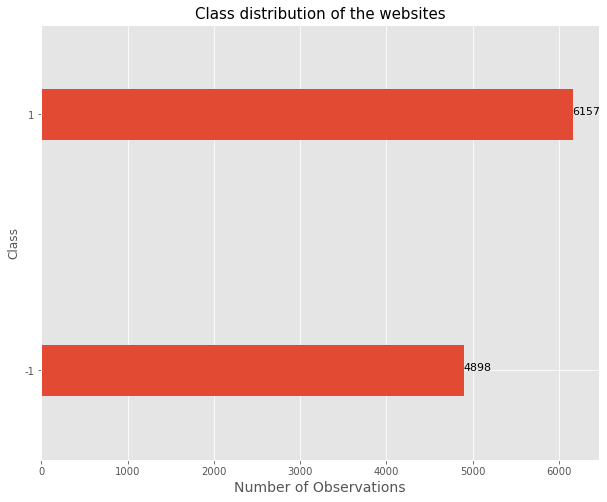

In [35]:
subplot = class_distr.groupby('Class')['Num_observations'].sum().plot(kind='barh',width=0.2, figsize=(10,8))
subplot.set_title('Class distribution of the websites', fontsize=15)
subplot.set_xlabel('Number of Observations', fontsize= 14)
for i in subplot.patches:
    subplot.text(i.get_width()+ 0.1, i.get_y()+0.1, str(i.get_width()),fontsize=11)


In [36]:
data.describe().T # to check how the columns are distrinuted in the dataset

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [37]:
# to check the type of data on the columns 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In this data set, all the columns contain integers

In the dataset there are no exsting missing values. Missing values can be a major problem whendesigning Machine Learning Models

# Cleaning the class labels

In [39]:
# preparing data for machine learning 

in this dataset any value with a -1 shows a phishing website and vice versa fpr a non-phishing website, although it is not good practice to create a Machine learning model with label values that are encorded as negative values and this is because it will affect the perfomance of the model. Therefore the value -1 in the  dataset should be changed to '0' on the class label

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [41]:
data.rename(columns={'Result':'Class'},inplace=True)

In [42]:
data.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [43]:
data['Class']=data['Class'].map({-1:0,1:1})

In [44]:
data.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [45]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [46]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

## Split the dataset

In [47]:
#we split the data into 80:20. Meaning 80% for training and 20% for testing

In [48]:
#Sckitlean train test split function

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X=data.iloc[:,0:30].values.astype(int)

In [51]:
X

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [52]:
y= data.iloc[:,30].values.astype(int)

In [53]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=np.random.seed(7))

In [55]:
X_train.shape

(8844, 30)

In [56]:
X_test.shape

(2211, 30)

In [57]:
8844+2211

11055

In [58]:
8844/11055*100

80.0

In [59]:
y.shape

(11055,)

In [60]:
y_train.shape

(8844,)

In [61]:
y_test.shape

(2211,)

In [62]:
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


# Creating a Logistic Regression Model

In [63]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
import wandb
import time

In [64]:
#we create a utility function that we cab re-use

In [65]:
def train_eval_pipeline(model, train_data,test_data,name):
    #initialize wandb
    wandb.init(project='ML for Phising Website Detection', name=name)
    #assign the data
    (X_train, y_train)= train_data
    (X_test, y_test)= test_data
    
    # Train the model
    start= time.time()
    model.fit(X_train, y_train)
    end= time.time()-start
    prediction=model.predict(X_test)
    
    wandb.log({"accuracy": accuracy_score(y_test, prediction)*100, "precision":precision_recall_fscore_support(y_test,prediction, average='macro')[0],"recall":precision_recall_fscore_support(y_test,prediction, average='macro')[1],"training_time": end})
    print("Accuracy score of the Logistic Regression Classifire with default hyperparameter values {0:2f}%".format(accuracy_score(y_test,prediction)*100.))
    print("\n")
    print("---Classification report of the Logistic Regression Classifier with default parameter values ---")
    print("\n")
    print(classification_report(y_test,prediction, target_names=["Phishing Websites","Normal Websites"])) 

In [66]:
logreg=LogisticRegression()

In [67]:
logreg

LogisticRegression()

In [68]:
train_eval_pipeline(logreg, (X_train,y_train),(X_test,y_test), "Logistic_Regression_Phishing_Websites")

wandb: Currently logged in as: wmunguti (use `wandb login --relogin` to force relogin)


Accuracy score of the Logistic Regression Classifire with default hyperparameter values 93.713252%


---Classification report of the Logistic Regression Classifier with default parameter values ---


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



# can we improve the model?

A good way to start is to tune the hyperparameters of the model. We need to define the grid of the values for the hyperparameters that we need to tune. For this example we use the random search for hyperparameter tuning  

In [69]:
# import the GridSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# Define the grid of the values

In [72]:
penalty = ["l1","l2"]

In [73]:
C=[0.8,0.9,1.0]

In [74]:
tol=[0.1,0.01,0.0001]

In [75]:
max_iter=[100,150,200,250]

In [76]:
# create a dictionary where tolerance=tol and maximum iterations=max_it are keys and lists 
# of their values are the corresponding values 

In [77]:
param_grid= dict(penalty=penalty,C=C,tol=tol,max_iter=max_iter)

In [78]:
# now that we have the grid, we look for a set of hyperparameter values

In [79]:
# initialise randomizedsearchCV with the required parameters

In [80]:
random_model= RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

In [81]:
#fit the model to the data

In [82]:
random_model_result= random_model.fit(X_train,y_train)

In [83]:
#sumarize the results

In [84]:
best_score, best_params=random_model_result.best_score_,random_model_result.best_params_

In [85]:
print ('Best score: %.2f using %s'%(best_score*100.,best_params))

Best score: 92.41 using {'tol': 0.1, 'penalty': 'l2', 'max_iter': 100, 'C': 0.9}


-comments the accuracy percentage has decreased to 0.9241 from 0.94 
-therefore means that random search did not help in boosting the accuracy much compared to gridsearch
-We use the hpyerparameter values and train another Logistic Regression Model with the values

In [86]:
# Log the results of the hyperparameter in wandb

In [87]:
config= wandb.config

In [88]:
config.tol=0.01

In [89]:
config.penalty="l2"

In [90]:
config.C=0.9

In [91]:
#Train the model again with the values

In [92]:
logreg=LogisticRegression(tol=config.tol, penalty=config.penalty, max_iter=100,C=config.C)

In [93]:
logreg

LogisticRegression(C=0.9, tol=0.01)

In [95]:
train_eval_pipeline(logreg, (X_train,y_train),(X_test,y_test), "Logistic-Regression-Random-Search")

accuracy,93.71325
precision,0.93703
recall,0.9353
training_time,0.81379


accuracy,▁
precision,▁
recall,▁
training_time,▁


Accuracy score of the Logistic Regression Classifire with default hyperparameter values 93.713252%


---Classification report of the Logistic Regression Classifier with default parameter values ---


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211

